## 卷积神经网络用于灰度图像处理
补全当前代码，对灰度图进行平滑卷积

图像位置在 ch5/code/lena512.png

请复制到你个人环境中，使用 Docker 环境的同学可使用 -v 参数挂载本地目录

In [62]:
# 示例代码运行环境
%load_ext watermark
%watermark -p tensorflow,numpy -v -m

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 2.7.6
IPython 5.3.0

tensorflow 1.0.1
numpy 1.12.0

compiler   : GCC 4.8.4
system     : Linux
release    : 4.9.13-moby
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit


In [14]:
%matplotlib inline

In [12]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [11]:
# 这里是 Tensorflow 用文件队列的形式进行文件读取的代码
# 文件队列的好处是可以异步读取数据，这样可以『多线程』进行工作
filenames = ['lena512.png']
filename_queue = tf.train.string_input_producer(filenames)

reader = tf.WholeFileReader()
key, value = reader.read(filename_queue)

images = tf.image.decode_png(value, channels=1)



In [55]:
with tf.Session() as sess:    
    # 文件队列异步读取进队列的一些操作，开始读取
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    before_image = sess.run(images)
    # 这里得到的其实是一个 512 x 512 x 1 的 numpy 数组
    print(before_image.shape)
    
    # 因为 conv2d 要求的是一个 4维的输入，这里用 expand_dim 扩展一维 (batch)
    input_ = tf.expand_dims(before_image, 0)
    ## 请在这里完成卷积操作，对图像进行平滑，并保存平滑后的图像。在最后进行展示
    
    # filter 也可以使用二维矩阵指定之后，用 expand_dims 进行扩展
    
    # 停止读取
    coord.request_stop()
    coord.join(threads)

(512, 512, 1)


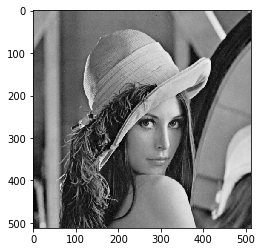

In [16]:
plt.imshow(before_image[:, :, 0], cmap='gray')